In [1]:
import pandas as pd
import glob


In [2]:
path=r'/Users/tomas/C Finance Oy/Analysis - Documents/Dashboard/openlyUnemployedSE/'

In [23]:
all_files = glob.glob(path + "/*.csv")

li = []
cols=['Vecka', '2020']
df_init=pd.DataFrame(data=range(53), columns=['Vecka'])+1
for filename in all_files:
    lan_name=filename.split('/')[7].split('.csv')[0]
    
    df = pd.read_csv(filename, index_col=None, header=0, delimiter=';')[cols].dropna()
    df.columns=['Vecka', lan_name]
    df.Vecka = df.Vecka.astype(str).astype(int)
    df_init=df_init.merge(df, left_on='Vecka', right_on='Vecka', how='left')

    #    li.append(df)
df_init.dropna(inplace=True)
df_init = df_init.set_index('Vecka')
#frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
# The reference week for unemployment is w 13
ref_week=13
last_week=df_init.index.max()

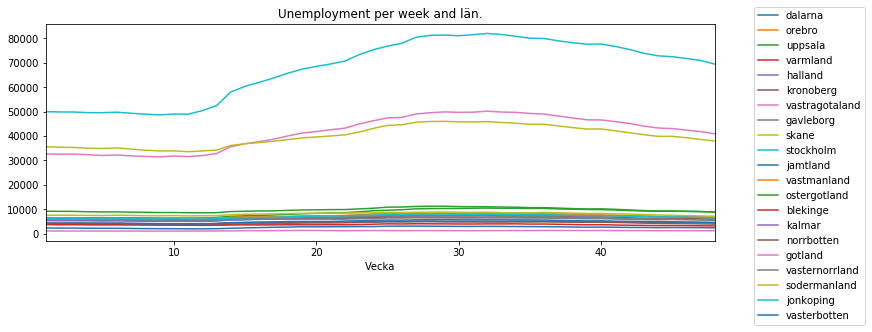

In [8]:
ax=df_init.plot(figsize=(12,4), title='Unemployment per week and län.')
ax.legend(bbox_to_anchor=(1.05,1.1), loc="upper left")

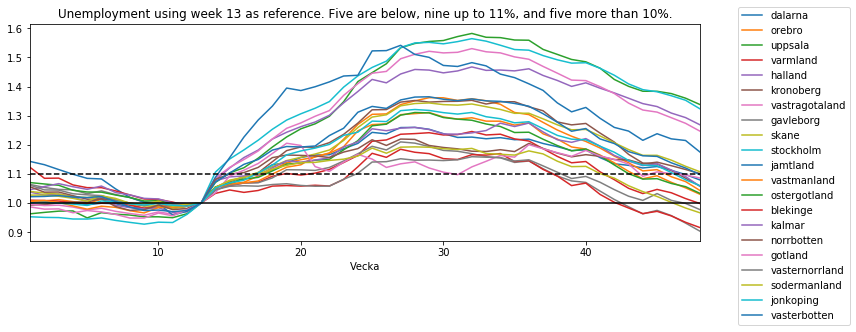

In [9]:
ax=(df_init/df_init.loc[ref_week]).plot(figsize=(12,4), title='Unemployment using week 13 as reference. Five are below, eleven up to 11%, and five more than 10%.')
ax.axhline(1, color='k')
ax.axhline(1.1, color='k', linestyle='--')
ax.legend(bbox_to_anchor=(1.05,1.1), loc="upper left")

In [55]:
foo=((df_init/df_init.loc[ref_week]).loc[last_week])
foo[foo>1.11]

dalarna           1.238193
orebro            1.361375
uppsala           1.558048
varmland          1.233716
halland           1.447015
kronoberg         1.348837
vastragotaland    1.515551
gavleborg         1.180721
skane             1.337996
stockholm         1.546713
jamtland          1.472516
vastmanland       1.295552
ostergotland      1.293622
blekinge          1.152507
kalmar            1.237378
norrbotten        1.190806
vasternorrland    1.145800
sodermanland      1.186698
jonkoping         1.310442
vasterbotten      1.356402
Name: 30, dtype: float64

In [16]:
sel_lan=foo[foo>1.11].index.values

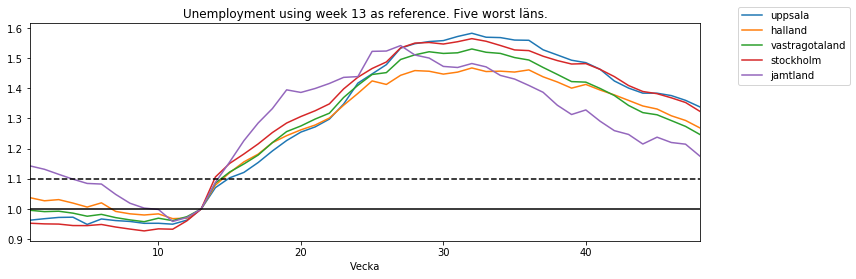

In [17]:
ax=(df_init[sel_lan]/df_init[sel_lan].loc[ref_week]).plot(figsize=(12,4), title='Unemployment using week 13 as reference. Five worst läns.')
ax.axhline(1, color='k')
ax.axhline(1.1, color='k', linestyle='--')
ax.legend(bbox_to_anchor=(1.05,1.1), loc="upper left")

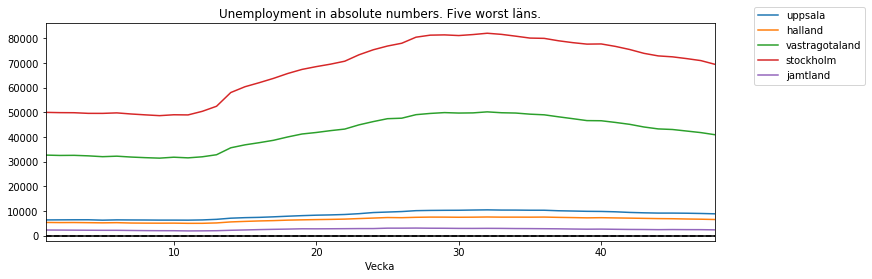

In [18]:
ax=(df_init[sel_lan]).plot(figsize=(12,4), title='Unemployment in absolute numbers. Five worst läns.')
ax.axhline(1, color='k')
ax.axhline(1.1, color='k', linestyle='--')
ax.legend(bbox_to_anchor=(1.05,1.1), loc="upper left")

In [61]:
show_week=last_week
name_id=(pd.read_csv("/Users/tomas/C Finance Oy/Analysis - Documents/Dashboard/openlyUnemployedSE/name_mapping.csv", 
             delimiter=';')[['ID','LAN_SHORTNAME','LAN']]
)
(((df_init/df_init.loc[ref_week]).loc[show_week]).to_frame().
 merge(name_id, left_index=True, right_on='LAN_SHORTNAME', how='inner').
 to_pickle('w'+str(show_week)+'_counties_percent.pkl')
)

In [50]:
pd.read_csv("/Users/tomas/C Finance Oy/Analysis - Documents/Dashboard/openlyUnemployedSE/name_mapping.csv", delimiter=';')

,Unnamed: 0,LAN,ID,LAN_SHORTNAME,Unnamed: 4
0,1.0,Kalmar län,8.0,kalmar,NaN
1,2.0,Jämtlands län,23.0,jamtland,NaN
2,3.0,Västerbottens län,24.0,vasterbotten,NaN
3,4.0,Stockholms län,1.0,stockholm,NaN
4,5.0,Västmanlands län,19.0,vastmanland,NaN
5,6.0,Västernorrlands län,22.0,vasternorrland,NaN
6,7.0,Hallands län,13.0,halland,NaN
7,8.0,Blekinge län,10.0,blekinge,NaN
8,9.0,Östergötlands län,5.0,ostergotland,NaN
9,10.0,Dalarnas län,20.0,dalarna,NaN


In [28]:
path

'/Users/tomas/C Finance Oy/Analysis - Documents/Dashboard/openlyUnemployedSE/'

In [32]:
! ls /Users/tomas/C\ Finance\ Oy/Analysis\ -\ Documents/Dashboard/openlyUnemployedSE/

blekinge.csv       jonkoping.csv      ostergotland.csv   vasterbotten.csv
dalarna.csv        kalmar.csv         skane.csv          vasternorrland.csv
gavleborg.csv      kronoberg.csv      sodermanland.csv   vastmanland.csv
gotland.csv        name_mapping.csv   stockholm.csv      vastragotaland.csv
halland.csv        norrbotten.csv     uppsala.csv
jamtland.csv       orebro.csv         varmland.csv
